# **FAKE NEWS**
### *DSB08RT_grupo_3_proyecto_2*

#### Preproceso


In [38]:
# Este código es para ejecutar desde google colab
'''
from google.colab import drive
drive.mount('/content/drive')

# ruta a vuestro zip
!cp "/content/drive/MyDrive/Colab Notebooks/data.zip" /content/
!unzip /content/data.zip

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
'''

'\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n\n# ruta a vuestro zip\n!cp "/content/drive/MyDrive/Colab Notebooks/data.zip" /content/\n!unzip /content/data.zip\n\nimport nltk\nnltk.download(\'stopwords\')\nnltk.download(\'punkt\')\nnltk.download(\'wordnet\')\n'

In [39]:
#------IMPORTAR LIBRERÍAS-------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from collections import Counter
from tqdm import tqdm

# Normalización
from sklearn.preprocessing import MinMaxScaler

# Métodos de Validación
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# Modelos de Clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm  import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Métricas para Clasificación
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# OverSampling y UnderSampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer

In [40]:
## cargar datos y representarlos
df = pd.read_csv("data.csv")
df


id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

In [41]:
# EDA Exploratiry Data Analisis

df.shape
df.describe()
df.info()
df.isna().sum()
df.shape[0] != df.drop_duplicates("title").shape[0]
df[(df['text'].isna()) & (df['title'].isna())]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


Empty DataFrame
Columns: [id, title, author, text, label]
Index: []

### Duplicados y NaN´s

In [42]:
# Se crea la columna 'texto' con la unión de las columnas 'title' y 'text'. Será la que se emplee para el análisis.
df['text'].fillna('', inplace=True)
df['title'].fillna('', inplace=True)
df['texto'] = df['title'] + ' ' + df['text']

C:\Users\river\AppData\Local\Temp\ipykernel_28064\862031923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].fillna('', inplace=True)
C:\Users\river\AppData\Local\Temp\ipykernel_28064\862031923.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

In [43]:
df['texto'].isna().sum()

0

In [44]:
df[df.duplicated("texto")]


id                                              title        author  \
1292    1292                                                        Anonymous   
1808    1808                                                        Anonymous   
1974    1974                                                        Anonymous   
2120    2120                                                        Enjoykin4   
3039    3039  UNAIRED Documentary Illuminati Child Abduction...      Pakalert   
...      ...                                                ...           ...   
20632  20632  Social Justice Attorney Andrea Burton: Jailed ...  Bill Quigley   
20652  20652  Jeddah airport was targeted by Ansar Allah mis...           NaN   
20728  20728  Trump warns of World War III if Clinton is ele...           NaN   
20749  20749  Realities Faced by Black Canadians are a Natio...     Anonymous   
20754  20754                     No More American Thanksgivings     Glen Ford   

                                                    text  label  \
1292   Same people all the time , i dont know how you...      1   
1808   Same people all the time , i dont know how you...      1   
1974   Same people all the time , i dont know how you...      1   
2120   A leading US senator: US Supporting War in Syr...      1   
3039   Support Us UNAIRED Documentary Illuminati Chil...      1   
...                                                  ...    ...   
20632  Tweet Widget by Bill Quigley \nA young Black l...      1   
20652  Email \n\nAn informed source in Yemen's AnsarA...      1   
20728  Email Donald Trump warned in an interview Tues...      1   
20749  Tweet Widget by Robyn Maynard \nCanada, includ...      1   
20754  Thanksgiving by Glen Ford \n“The core ideologi...      1   

                                                   texto  
1292    Same people all the time , i dont know how yo...  
1808    Same people all the time , i dont know how yo...  
1974    Same people all the time , i dont know how yo...  
2120    A leading US senator: US Supporting War in Sy...  
3039   UNAIRED Documentary Illuminati Child Abduction...  
...                                                  ...  
20632  Social Justice Attorney Andrea Burton: Jailed ...  
20652  Jeddah airport was targeted by Ansar Allah mis...  
20728  Trump warns of World War III if Clinton is ele...  
20749  Realities Faced by Black Canadians are a Natio...  
20754  No More American Thanksgivings Thanksgiving by...  

[110 rows x 6 columns]

In [45]:
# Se eliminan los duplicados y las columnas que no interesan
df = df.drop_duplicates('texto')
df = df.drop(['id', 'title', 'text'], axis=1)
df

author  label  \
0                                  Darrell Lucus      1   
1                                Daniel J. Flynn      0   
2                             Consortiumnews.com      1   
3                                Jessica Purkiss      1   
4                                 Howard Portnoy      1   
...                                          ...    ...   
20795                              Jerome Hudson      0   
20796                           Benjamin Hoffman      0   
20797  Michael J. de la Merced and Rachel Abrams      0   
20798                                Alex Ansary      1   
20799                              David Swanson      1   

                                                   texto  
0      House Dem Aide: We Didn’t Even See Comey’s Let...  
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...  
2      Why the Truth Might Get You Fired Why the Trut...  
3      15 Civilians Killed In Single US Airstrike Hav...  
4      Iranian woman jailed for fictional unpublished...  
...                                                  ...  
20795  Rapper T.I.: Trump a ’Poster Child For White S...  
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...  
20797  Macy’s Is Said to Receive Takeover Approach by...  
20798  NATO, Russia To Hold Parallel Exercises In Bal...  
20799  What Keeps the F-35 Alive   David Swanson is a...  

[20690 rows x 3 columns]

#### Preprocesamiento del texto

In [46]:
STOPWORDS = nltk.corpus.stopwords.words("english")

In [47]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto_limpio = ""
    for s in texto:
        if s.isalnum() or s.isspace():
            texto_limpio += s
    return texto_limpio

In [48]:
def tokenizar_eliminar_stopwords(texto):
    tokens = nltk.word_tokenize(text = texto)
    tokens = [token for token in tokens if token not in STOPWORDS]
    return tokens

In [49]:
def tokens_stemmer(tokens):   # probar tb con lemmatizer
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

In [50]:
def tokens_lemmatizer(tokens):   # probar tb con lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

In [51]:
# Se genera el texto procesado mediante Stemmer
df['texto_procesado_stem'] = df['texto'].apply(limpiar_texto)
df['texto_procesado_stem'] = df['texto_procesado_stem'].apply(tokenizar_eliminar_stopwords)
df['texto_procesado_stem'] = df['texto_procesado_stem'].apply(tokens_stemmer)

In [52]:
# Se genera el texto procesado mediante Lemmatizer
df['texto_procesado_lem'] = df['texto'].apply(limpiar_texto)
df['texto_procesado_lem'] = df['texto_procesado_lem'].apply(tokenizar_eliminar_stopwords)
df['texto_procesado_lem'] = df['texto_procesado_lem'].apply(tokens_lemmatizer)

#### División de los datos

In [53]:
# Se procesan los datos obtenidos mediante Stemmer
X = df['texto_procesado_stem'].values
y = df['label'].values

In [54]:
# Comprobamos que los datos están balanceados
pd.Series(y).value_counts(normalize=True)

0    0.50203
1    0.49797
Name: proportion, dtype: float64

In [55]:
X_train, X_test, y_train_stem, y_test_stem = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [56]:
count_vectorizer = CountVectorizer(max_features = 6000)

bag_train = count_vectorizer.fit_transform(X_train)

bag_test = count_vectorizer.transform(X_test)

In [151]:
vocabulario_ordenado = sorted(count_vectorizer.vocabulary_, key = lambda x : count_vectorizer.vocabulary_[x])
vocabulario = count_vectorizer.vocabulary_

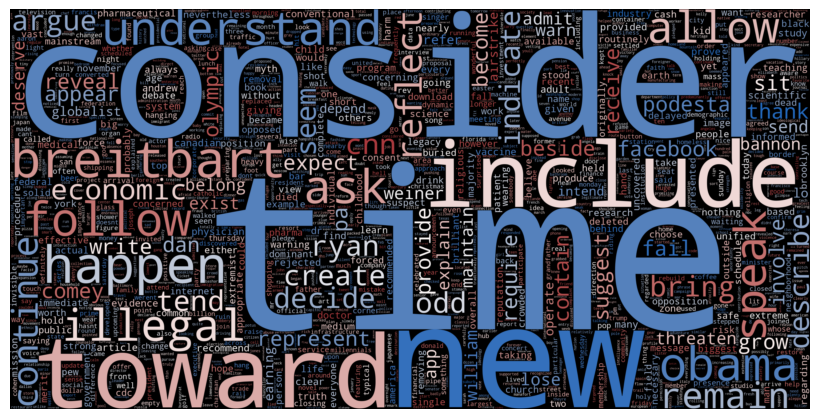

In [152]:
# Generate worldcloud
from wordcloud import WordCloud
plt.figure(figsize=(8,8))
text = " ".join(vocabulario)              
word_cloud = WordCloud(
        max_words=1500,
        width=3000,
        height=1500,
        random_state=42,
        colormap="vlag",
        collocations=False,
        stopwords= STOPWORDS,
        ).generate(text)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

In [58]:
tfidf = TfidfTransformer()

bag_tfidf_train_stem = tfidf.fit_transform(bag_train).toarray()

bag_tfidf_test_stem = tfidf.transform(bag_test).toarray()

In [59]:
# Se procesan los datos obtenidos mediante Lemmatizer
X = df['texto_procesado_lem'].values
y = df['label'].values

X_train, X_test, y_train_lem, y_test_lem = train_test_split(X, y, test_size = 0.25, random_state = 42)

count_vectorizer = CountVectorizer(max_features = 6000)

bag_train = count_vectorizer.fit_transform(X_train)

bag_test = count_vectorizer.transform(X_test)
vocabulario_ordenado = sorted(count_vectorizer.vocabulary_, key = lambda x : count_vectorizer.vocabulary_[x]) 
tfidf = TfidfTransformer()

bag_tfidf_train_lem = tfidf.fit_transform(bag_train).toarray()

bag_tfidf_test_lem = tfidf.transform(bag_test).toarray()

In [60]:
print(sorted(count_vectorizer.vocabulary_.items()))

[('000', 0), ('10', 1), ('100', 2), ('1000', 3), ('10000', 4), ('100000', 5), ('11', 6), ('12', 7), ('120', 8), ('125', 9), ('13', 10), ('14', 11), ('15', 12), ('150', 13), ('16', 14), ('17', 15), ('18', 16), ('19', 17), ('1948', 18), ('1950s', 19), ('1960s', 20), ('1964', 21), ('1967', 22), ('1968', 23), ('1970s', 24), ('1973', 25), ('1979', 26), ('1980', 27), ('1980s', 28), ('1984', 29), ('1986', 30), ('1987', 31), ('1988', 32), ('1989', 33), ('1990', 34), ('1990s', 35), ('1991', 36), ('1992', 37), ('1993', 38), ('1994', 39), ('1995', 40), ('1996', 41), ('1997', 42), ('1998', 43), ('1999', 44), ('19th', 45), ('20', 46), ('200', 47), ('2000', 48), ('2001', 49), ('2002', 50), ('2003', 51), ('2004', 52), ('2005', 53), ('2006', 54), ('2007', 55), ('2008', 56), ('2009', 57), ('2010', 58), ('2011', 59), ('2012', 60), ('2013', 61), ('2014', 62), ('2015', 63), ('2016', 64), ('2017', 65), ('2018', 66), ('2020', 67), ('20th', 68), ('21', 69), ('21st', 70), ('22', 71), ('23', 72), ('24', 73), (

#### Modelos

In [61]:
modelos = [KNeighborsClassifier(),
           # RadiusNeighborsClassifier(),
           NearestCentroid(),
           LogisticRegression(),
           GaussianNB(),
           BernoulliNB(),
           DecisionTreeClassifier(),
           RandomForestClassifier(),
           SVC(),
           AdaBoostClassifier(),
           GradientBoostingClassifier()]


In [62]:
%%time

datos = list()

for model in tqdm(modelos):
    for suffix in tqdm(['_stem','_lem']):
        bag_tfidf_train = globals()['bag_tfidf_train'+suffix]
        bag_tfidf_test = globals()['bag_tfidf_test'+suffix]
        y_test = globals() ['y_test'+suffix]
        y_train = globals() ['y_train'+suffix]

        model.fit(bag_tfidf_train, y_train)
        
        yhat = model.predict(bag_tfidf_test)
        
        jaccard   = jaccard_score(y_test, yhat)
        accuracy  = accuracy_score(y_test, yhat)
        precision = precision_score(y_test, yhat)
        recall    = recall_score(y_test, yhat)
        f1        = f1_score(y_test, yhat)
        roc_auc   = roc_auc_score(y_test, yhat)
        cm        = confusion_matrix(y_test, yhat)    
        
        datos.append([(str(model)+suffix), model, jaccard, accuracy, precision, recall, f1, roc_auc, cm])
    
columnas = ["model_name", "model", "jaccard_index", "accuracy", "precision", "recall", "f1", "roc_auc", "confusion_matrix"]



 80%|████████  | 8/10 [31:21<18:46, 563.34s/it]c:\Users\river\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\river\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
100%|██████████| 10/10 [52:07<00:00, 312.76s/it]

CPU times: total: 36min 4s
Wall time: 52min 7s


In [66]:
df_metricas = pd.DataFrame(data    = datos,
                           columns = columnas)
df_metricas = df_metricas.sort_values("accuracy", ascending = False)
df_metricas.to_csv('resultados/df_metricas.csv')

In [81]:
df_metricas

model_name  \
18  GradientBoostingClassifier()_stem   
19   GradientBoostingClassifier()_lem   
16          AdaBoostClassifier()_stem   
17           AdaBoostClassifier()_lem   
14                         SVC()_stem   
13       RandomForestClassifier()_lem   
12      RandomForestClassifier()_stem   
15                          SVC()_lem   
4           LogisticRegression()_stem   
5            LogisticRegression()_lem   
10      DecisionTreeClassifier()_stem   
11       DecisionTreeClassifier()_lem   
2              NearestCentroid()_stem   
6                   GaussianNB()_stem   
3               NearestCentroid()_lem   
7                    GaussianNB()_lem   
9                   BernoulliNB()_lem   
8                  BernoulliNB()_stem   
0         KNeighborsClassifier()_stem   
1          KNeighborsClassifier()_lem   

                                                model  jaccard_index  \
18  ([DecisionTreeRegressor(criterion='friedman_ms...       0.932841   
19  ([DecisionTreeRegressor(criterion='friedman_ms...       0.931174   
16  (DecisionTreeClassifier(max_depth=1, random_st...       0.929967   
17  (DecisionTreeClassifier(max_depth=1, random_st...       0.929572   
14                                              SVC()       0.926514   
13  (DecisionTreeClassifier(max_features='sqrt', r...       0.921561   
12  (DecisionTreeClassifier(max_features='sqrt', r...       0.921102   
15                                              SVC()       0.919307   
4                                LogisticRegression()       0.912852   
5                                LogisticRegression()       0.906535   
10                           DecisionTreeClassifier()       0.888203   
11                           DecisionTreeClassifier()       0.883164   
2                                   NearestCentroid()       0.784376   
6                                        GaussianNB()       0.748557   
3                                   NearestCentroid()       0.772073   
7                                        GaussianNB()       0.728541   
9                                       BernoulliNB()       0.601719   
8                                       BernoulliNB()       0.596853   
0                              KNeighborsClassifier()       0.570311   
1                              KNeighborsClassifier()       0.560686   

    accuracy  precision    recall        f1   roc_auc  \
18  0.964817   0.959029  0.971560  0.965254  0.964777   
19  0.963851   0.956522  0.972329  0.964361  0.963800   
16  0.963271   0.957859  0.969639  0.963713  0.963232   
17  0.963078   0.958191  0.968870  0.963501  0.963043   
14  0.961531   0.959465  0.964258  0.961855  0.961515   
13  0.959211   0.965719  0.952729  0.959180  0.959250   
12  0.959018   0.966797  0.951191  0.958931  0.959065   
15  0.957665   0.957039  0.958878  0.957957  0.957657   
4   0.953992   0.950801  0.958109  0.954441  0.953967   
5   0.950512   0.947710  0.954266  0.950977  0.950490   
10  0.940460   0.941154  0.940430  0.940792  0.940460   
11  0.937754   0.940495  0.935434  0.937958  0.937768   
2   0.868742   0.818694  0.949270  0.879160  0.868256   
6   0.865262   0.924276  0.797463  0.856200  0.865671   
3   0.859269   0.806409  0.947733  0.871378  0.858736   
7   0.853277   0.913043  0.782859  0.842955  0.853701   
9   0.731297   0.702811  0.807071  0.751342  0.730840   
8   0.727624   0.700235  0.801691  0.747536  0.727178   
0   0.628455   0.576888  0.980400  0.726367  0.626334   
1   0.613764   0.567171  0.980015  0.718512  0.611556   

              confusion_matrix  
18   [[2463, 108], [74, 2528]]  
19   [[2456, 115], [72, 2530]]  
16   [[2460, 111], [79, 2523]]  
17   [[2461, 110], [81, 2521]]  
14   [[2465, 106], [93, 2509]]  
13   [[2483, 88], [123, 2479]]  
12   [[2486, 85], [127, 2475]]  
15  [[2459, 112], [107, 2495]]  
4   [[2442, 129], [109, 2493]]  
5   [[2434, 137], [119, 2483]]  
10  [[2418, 153], [155, 2447]]  
11  [[2417, 154], [168, 2434]]  
2   [[2024, 547], [132, 2

### GridSearchCV
- Observamos que los resultados obtenidos mediante Lemmatizer y Stemmer son casi idénticos, a partir de aquí se emplearán los obtenidos mediante Stemmer
- Se define en un diccionario los parámetros de cada modelo. 
- Se ejecuta el GridSearchCV para el modelo LogisticRegression. 
- El que mejor resultados arroja es el GradientBoostingClassifier, pero por muy poca diferencia. Debido a los tiempos de computación se ha desestimado emplear este método y se ha optado por el modelo LogisticRegression.

In [67]:
# empleamos los dato obtenidos mediante Stemmer que son los que mejores resultados ofrecen en el modelo LogisticRegression 
bag_tfidf_train = bag_tfidf_train_stem
bag_tfidf_test = bag_tfidf_test_stem
y_test = y_test_stem
y_train = y_train_stem

In [83]:
modelos = {    LogisticRegression():    {
                                        'penalty'      : ['l1', 'l2', 'elasticnet', 'None'],
                                        'dual'         : [False, True],
                                        'solver'       : ['lbfgs', 'newton-cholesky'],
                                        "multi_class" : ['auto', 'ball_tree', 'kd_tree', 'brute']
                                   }  
              # GradientBoostingClassifier(): {
                #                        'n_estimators'  :  [80, 100, 150],
                 #                       'learning_rate' :  [0.1, 0.15]
                  #                 }
                                   }

In [75]:
'''modelos = { 
    KNeighborsClassifier() : {
                                        "n_neighbors"  : [1+2*i for i in range(40)],
                                        "algorithm"    : ['auto', 'ball_tree', 'kd_tree', 'brute']
                                        },
        
           NearestCentroid() :      {
                                        "metric"  : ['euclidean'],
                                        },
           LogisticRegression():    {
                                        'penalty' : ['l1', 'l2', 'elasticnet', 'None'],
                                        'dual' : [False, True],
                                        'solver': ['lbfgs', 'newton-cholesky'],
                                        'n_jobs'  : [-1],
                                        "multi_class"    : ['auto', 'ball_tree', 'kd_tree', 'brute']
                                        },
           GaussianNB() : {
                                        'priors' : ['None']
                                        },
           DecisionTreeClassifier(): {
                                        'criterion'         : ["gini", "entropy"],
                                        'splitter'          : ["best", "random"],
                                        'max_depth'         : [2*i for i in range (3,40,2)],
                                        'min_samples_split' : [j for j in range (2,11)],
                                        'max_features'      : ["sqrt", "log2", None],
                                        'random_state'      : 42,
                                        'max_leaf_nodes'    : 10
                                        },
           RandomForestClassifier(): {
                                        "n_estimators"           : [100, 150, 200], # Numero de arboles
                                        "criterion"              : ["gini", "entropy"], # Es la función para medir la calidad de una división/split.
                                        "max_depth"              : range(12, 25, 3), # La profundidad máxima del árbol.
                                        "max_features"           : ["sqrt", "log2", None], # El número de características (atributos) a considerar en cada split
                                        "max_leaf_nodes"         : range(90, 151, 10), # Maximo de nodos hoja del arbol
                                        "min_impurity_decrease"  : [0.0, 0.1, 0.2, 0.3], # Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
                                        "min_samples_split"      : [2, 10, 15, 20], # El número mínimo de muestras requeridas para llegar a nodo hoja.
                                        "random_state"           : [42]
                                        },
           SVC():                   {
                                        "kernel": ['linear', 'poly', 'rbf'],
                                        "C": [0.5, 1, 2],
                                        "random_state":[42]
                                        },
           AdaBoostClassifier() : {
                                        "n_estimators"   : [i*25 for i in range(2, 8)],
                                        'algorithm' : ['SAMME', 'SAMME.R']
                                        },
           GradientBoostingClassifier(): {
                                        'n_estimators'  :  [100, 150, 200, 250, 300],
                                        'learning_rate' :  [0.05, 0.1, 0.15],
                                        'max_depth'     :  [2,3,4],
                                        'subsample'     :  [0.5, 1]                                     
                                   }
                                   }'''

'modelos = { \n    KNeighborsClassifier() : {\n                                        "n_neighbors"  : [1+2*i for i in range(40)],\n                                        "algorithm"    : [\'auto\', \'ball_tree\', \'kd_tree\', \'brute\']\n                                        },\n        \n           NearestCentroid() :      {\n                                        "metric"  : [\'euclidean\'],\n                                        },\n           LogisticRegression():    {\n                                        \'penalty\' : [\'l1\', \'l2\', \'elasticnet\', \'None\'],\n                                        \'dual\' : [False, True],\n                                        \'solver\': [\'lbfgs\', \'newton-cholesky\'],\n                                        \'n_jobs\'  : [-1],\n                                        "multi_class "    : [\'auto\', \'ball_tree\', \'kd_tree\', \'brute\']\n                                        },\n           GaussianNB() : {\n               

In [84]:
%%time

datos = list()

for model, params in tqdm(modelos.items()):
    
    scorers = ["f1_macro", "accuracy", "recall_macro", "roc_auc"]
    grid_solver = GridSearchCV(estimator  = model, 
                       param_grid = params    , 
                       scoring    = scorers   ,
                       cv         = 5         ,
                       refit      = "accuracy" 
                       )
    model_result = grid_solver.fit(bag_tfidf_train, y_train)
    model_result.best_estimator_.get_params()
    
    yhat = model_result.best_estimator_.predict(bag_tfidf_test)
    
    jaccard   = jaccard_score(y_test, yhat, average = "macro")
    accuracy  = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat, average = "macro")
    recall    = recall_score(y_test, yhat, average = "macro")
    f1        = f1_score(y_test, yhat, average = "macro")
    roc_auc   = roc_auc_score(y_test, yhat)
    cm        = confusion_matrix(y_test, yhat)    
    params_top= model_result.best_estimator_.get_params()
    
    datos.append([model, params_top, jaccard, accuracy, precision, recall, f1, roc_auc, cm])
    
columnas = ["model", 'params_top', "jaccard_index", "accuracy", "precision", "recall", "f1", "roc_auc", "confusion_matrix"]

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\river\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
310 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\river\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\river\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

CPU times: total: 19min 45s
Wall time: 4min 25s


In [99]:
df_metricas_top = pd.DataFrame(data    = datos,
                           columns = columnas)
df_metricas_top = df_metricas_top.sort_values("accuracy", ascending = False)
df_metricas_top.to_csv('resultados/df_metricas_top.csv')

In [100]:
df_metricas_top

model_name                 model  \
0  LogisticRegression()_lem  LogisticRegression()   

                                          params_top  jaccard_index  accuracy  \
0  {'C': 1.0, 'class_weight': None, 'dual': False...       0.905684  0.950512   

   precision   recall        f1  roc_auc            confusion_matrix  
0   0.950549  0.95049  0.950508  0.95049  [[2434, 137], [119, 2483]]

In [ ]:
### Gráficos de comprobación (ver en resumenes 5.4)

## Validación
- Hold-Out
- Leave One Out
- k-Fold Cross Validation  (es el más importante)
- Stratified k-Fold

In [86]:
XX = np.concatenate ([bag_tfidf_train, bag_tfidf_test],axis=0)
yy = np.concatenate([y_train,y_test], axis=0)

In [87]:
modelos = df_metricas_top['model'].tolist()
params_top = df_metricas_top['params_top'].tolist()

In [101]:
df_metricas_top

model_name                 model  \
0  LogisticRegression()_lem  LogisticRegression()   

                                          params_top  jaccard_index  accuracy  \
0  {'C': 1.0, 'class_weight': None, 'dual': False...       0.905684  0.950512   

   precision   recall        f1  roc_auc            confusion_matrix  
0   0.950549  0.95049  0.950508  0.95049  [[2434, 137], [119, 2483]]

In [88]:
'''# Ejemplo para probar codigo de validación
modelos = [LogisticRegression,GradientBoostingClassifier]      
params_top= [{ 'penalty'        : 'l2' },   
            { 'n_estimators'    :  100,
                'learning_rate' :  0.1  }]
modelos = [LogisticRegression]      
params_top= [{ 'penalty'        : 'l2' }
            ]'''


"# Ejemplo para probar codigo de validación\nmodelos = [LogisticRegression,GradientBoostingClassifier]      \nparams_top= [{ 'penalty'        : 'l2' },   \n            { 'n_estimators'    :  100,\n                'learning_rate' :  0.1  }]\nmodelos = [LogisticRegression]      \nparams_top= [{ 'penalty'        : 'l2' }\n            ]"

##### Hold-Out

100%|██████████| 100/100 [04:04<00:00,  2.45s/it]


Min de Accuracy:LogisticRegression() 0.9461897857257935
Media de Accuracy: LogisticRegression() 0.95153858546802
Max de Accuracy: LogisticRegression() 0.9581118092476236
CPU times: total: 15min 48s
Wall time: 4min 5s


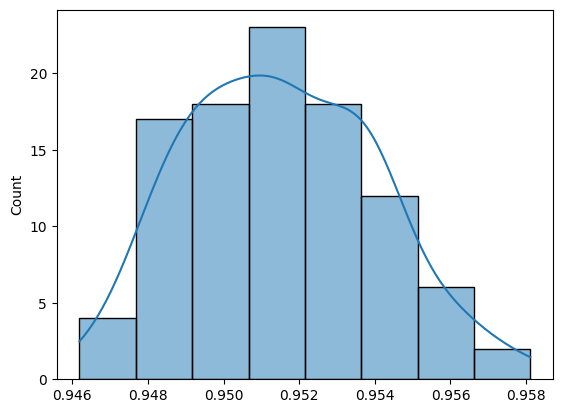

In [103]:
%%time

lista_acc = list()
for modelo,param in zip (modelos,params_top):
    model = modelo.__class__(**param)
    for i in tqdm(range(100)):
    
        X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = 0.3)
    
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        
        # print("Accuracy:", accuracy_score(y_test, yhat))
        lista_acc.append(accuracy_score(y_test, yhat))
    
    # stratify separa el y_train y y_test para que tengan la misma proporcion de clases

    print(f"Min de Accuracy:{modelo} {np.array(lista_acc).min()}")
    print(f"Media de Accuracy: {modelo} {np.array(lista_acc).mean()}")
    print(f"Max de Accuracy: {modelo} {np.array(lista_acc).max()}")

    # graficamos
    import seaborn as sns
    sns.histplot(x = lista_acc, kde = True)

##### Leave One Out

In [141]:
%%time

loo = LeaveOneOut()


# EL for va a realizar 150 iteraciones porque es un total de 150 patrones
for modelo,param in zip (modelos,params_top):
    yhat = list()
    model = modelo.__class__(**param)
    i = 0
    for train_index, test_index in tqdm(loo.split(XX)):
        
        X_train, X_test = XX[train_index], XX[test_index]
        y_train, y_test = yy[train_index], yy[test_index]
        
        # Modelo
        model.fit(X_train, y_train)
        
        # Prediccion
        yhat1 = model.predict(X_test)
        yhat.append(yhat1)
        
        i += 1
        if i>2000:
            break

    print("Accuracy:",modelo, accuracy_score(yy[:2001], yhat))

2000it [1:56:59,  3.51s/it]

Accuracy: LogisticRegression() 0.9615192403798101
CPU times: total: 8h 2min 28s
Wall time: 1h 56min 59s


##### k-Fold Cross Validation


In [138]:
%%time

kfold = KFold(n_splits = 5)
yhat = list()

for modelo,param in  zip (modelos,params_top):
    yhat = list()
    model = modelo.__class__(**param)
# El for va a realizar 5 iteraciones porque estamos haciendo 5 cortes diferentes.
    for train_index, test_index in tqdm( kfold.split(XX)): 
        X_train, X_test = XX[train_index], XX[test_index]
        y_train, y_test = yy[train_index], yy[test_index]

        # Modelo        
        model.fit(X_train, y_train)

        # Prediccion
        yhat1 = model.predict(X_test)
        yhat.extend(yhat1)
            
    print("Accuracy:",modelo, accuracy_score(yy, yhat))

5it [00:14,  2.80s/it]

Accuracy: LogisticRegression() 0.952972450459159
CPU times: total: 1min 9s
Wall time: 14 s


##### Stratified k-Fold

In [140]:
%%time

skfold = StratifiedKFold(n_splits = 50)

for modelo,param in tqdm (zip (modelos,params_top)):
    y_test_real, yhat = list(), list()
    model = modelo.__class__(**param)
    # EL for va a realizar 5 iteraciones porque estamos haciendo 5 cortes diferentes.
    for train_index, test_index in tqdm(skfold.split(XX, yy)): 
        X_train, X_test = XX[train_index], XX[test_index]
        y_train, y_test = yy[train_index], yy[test_index]
        
        # Modelo
        model.fit(X_train, y_train)
        
        # Prediccion
        yhat1 = model.predict(X_test)
        yhat.extend(yhat1)    
    
        # Valores reales
        y_test_real.extend(y_test)

    print("Accuracy:",modelo, accuracy_score(y_test_real, yhat))

50it [02:21,  2.84s/it]
1it [02:22, 142.02s/it]

Accuracy: LogisticRegression() 0.956065732237796
CPU times: total: 10min 41s
Wall time: 2min 22s
